# Practical Machine Learning for Physicists

## Week 1: Introduction to Neural Networks

Welcome to the Practical Machine Learning for Physicists course. Perhaps a more honest title would have been "A skeptics guide to machine learning", but we will come back to my skepticism later in the course. 

The goals of this week's notes are to:
- Introduce the key features of neural networks
- Code (in pure python) our first neural network
- Investigate how we can visualise our first neural network
- Play around with some of the key concepts 

### Introduction to neural networks

It is also worth reminding ourselves that machine learning is actually very simple. At times it will seem as though we are lost in a see of almost meaningless, confusing jargon... but remember all we are doing in this course is just some variation of curve fitting (or 'regression') albeit with a very large number of parameters.

So lets imagine that we have some data, which we are going to represent as a vector $x$ in some high-dimensional space. An example of this type of data could be all of the pixel intensities in a given image, or all of the words in a given dictionary, or *insert your own example here*. A neural network is just a network that consists a few components:
* An input layer (our data $x$)
* An output layer (our output $z$, which doesn't have to be the same size as $x$)
* Some number of intermediary layers... sometimes called hidden layers $y$
* An 'activation function' at each neuron 

So lets define our the response of one of the neurons $y_i$ as being $$y_i = f( \sum_j W^i_j x^j + b^i)$$ where $x^j$ are the components of our data vector $x$, $W$ is 'weight' matrix and $b$ is a 'bias' vector. The final component of the neuron output is our activation function $f$. The essential feature that we need for our activation function is that it is non-linear.

An example of a non-linear activation function is the sigmoid function $$f_{sigmoid}(x) = \frac{1}{ 1 + e^{-x}}$$

Text(0.5, 1.0, 'Sigmoid')

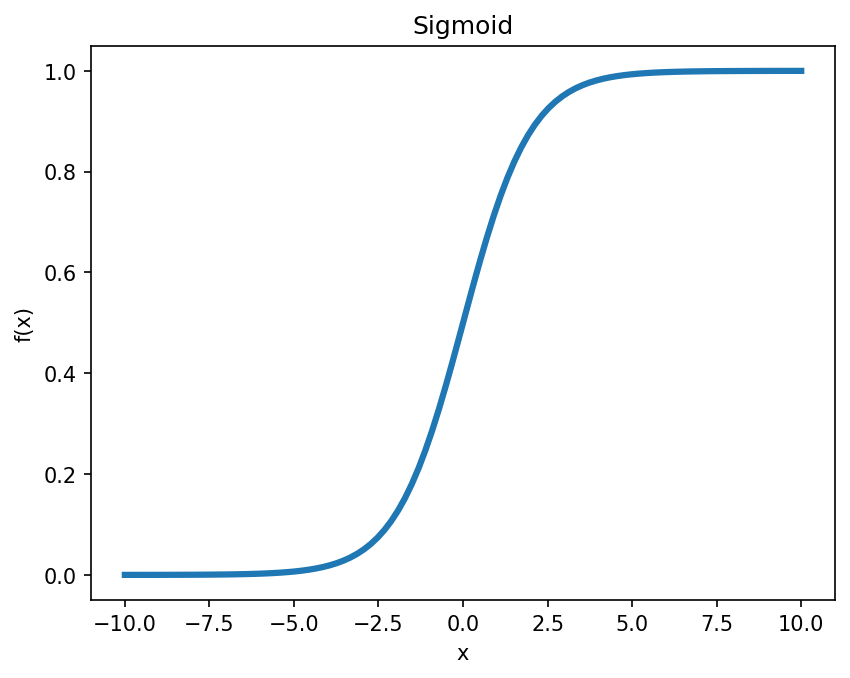

In [4]:
#So now we will have our first bit of code
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=150 # dots per inch

#Actually plot something
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x=np.linspace(-10,10,100)  #Get 100 points from -10 to 10

# At this point you might want to pause to reacquaint yourself with numpy arrays
# What does np.linspace(-10,10,100) actually mean? What is the np part? Why is there a fullstop between np and linspace? What does the function return?
# What would you expect to see if you ran the following lines of code?
#print(x.shape)
#print(x[1]-x[0])  #This one is easy to get wrong
#print(x)

# Now that you remember about what kind of thing x is here, what is the following code doing?
# Why do we call np.exp(-x) rather than math.exp(-x) ?
ax.plot(x,1./(1.+np.exp(-x)),linewidth=3) #Plot x vs Sigmoid with a linewidth of 3
ax.set_xlabel("x")  # Set the x label to x
ax.set_ylabel("f(x)") # Set the y label to f(x)
ax.set_title("Sigmoid") # Set the title to "Sigmoid"

Another very popular (perhaps the most popular) activation is the very impressively named "Rectified Linear Unit" or ReLU. It is a piecewise linear function function with two pieces, one of which is zero.

4.141414141414142
True
4.141414141414142


Text(0, 0.5, 'f(x)')

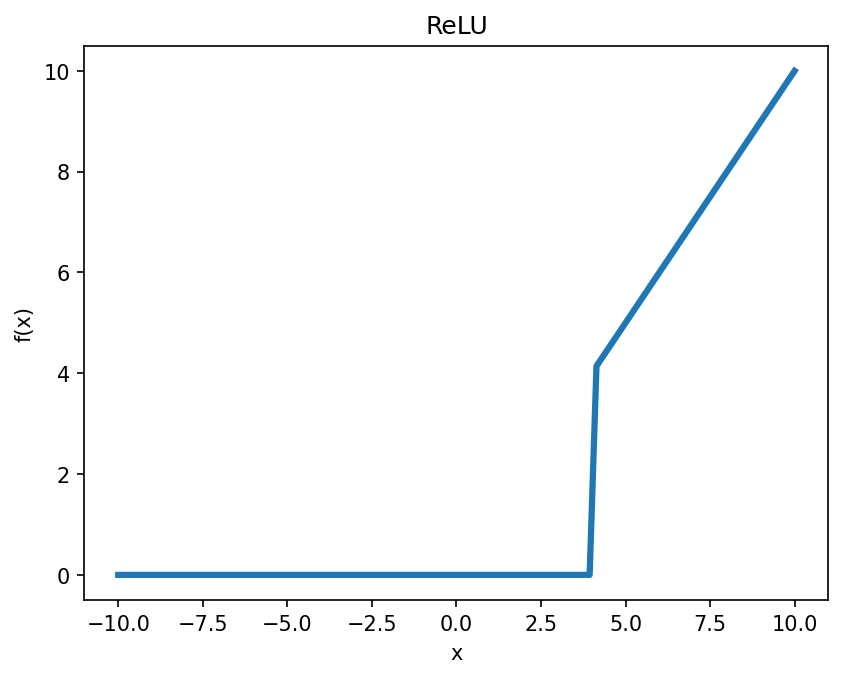

In [5]:
#Plot the ReLU
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x=np.linspace(-10,10,100)  #Get 100 points from -10 to 10

# Here is another point where you might want to stop and thing for a minute or two
# What does (x>0) return?
#print(x>0)
# So what happens when we do x*(x>0) ?
print(x[70]*(x[70]>4))

print((x[70]>4))
print(x[70])
# The boolean x>0 returns either True or False. True represents a value 1, whereas False represents 0. Hence if the x[i] is greater than 0 then x[i] * (x[i]>0) returns x[i], whereas if x[i] 
# Where less than 0 it would return 0. 


ax.plot(x,x*(x>4),linewidth=3)  #Plot x vs ReLU with a linewidth of 5
ax.set_xlabel("x") # Set the x label to x
ax.set_title("ReLU") # Set the title to "ReLU" 
ax.set_ylabel("f(x)") # Set the y label to f(x)


Text(0.5, 1.0, 'Tanh')

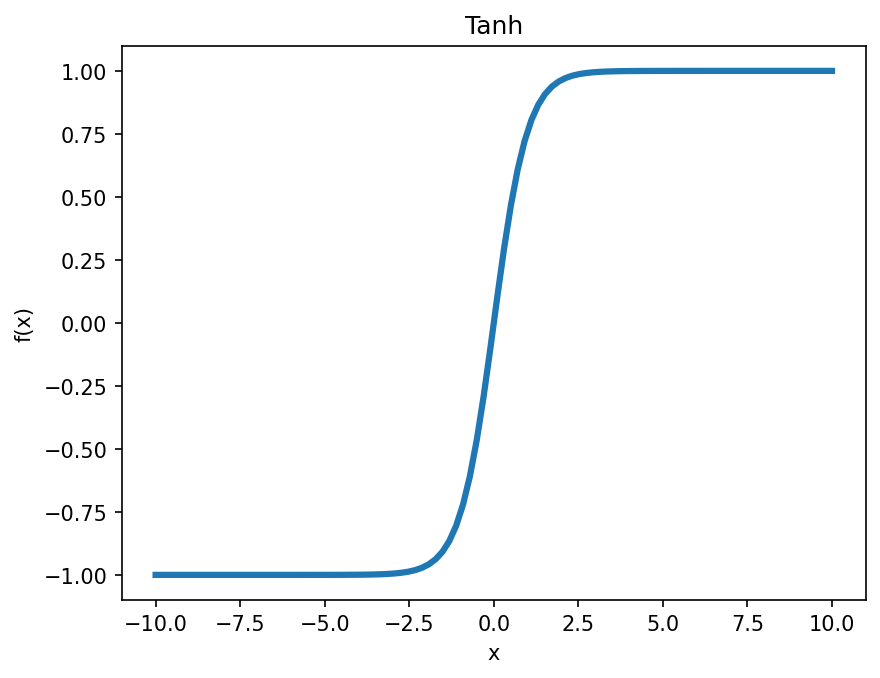

In [6]:
#Plot the hyperbolic tangent
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x=np.linspace(-10,10,100)  #Get 100 points from -10 to 10
ax.plot(x,(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)),linewidth=3) #Plot x vs Sigmoid with a linewidth of 3
ax.set_xlabel("x") # Set the x label to x
ax.set_ylabel("f(x)") # Set the y label to f(x)
ax.set_title("Tanh") # Set the title to "Tanh" 

## Our first neural network
So now we will make our very first neural network it will consist of just an input layer and output layer with no hidden layers.

At first we are going to have a neural network that takes an input consisting of 4 nodes and produces an output consisting of 3 nodes. We can write this as matrix calculation where we will call the input $x$ and the result of the matrix calculation $z$. Our weights and biases will be $w$ and $b$.
$$ x = \begin{pmatrix} x_0 \\ x_1 \\x_2 \\x_3 \end{pmatrix} $$
$$ z = \begin{pmatrix} z_0 \\ z_1 \\z_2 \end{pmatrix} $$
$$ b = \begin{pmatrix} b_0 \\ b_1 \\b_2 \end{pmatrix} $$
$$ w = \begin{pmatrix} w_{00} & w_{01} & w_{02} & w_{03} \\ w_{10} & w_{11} & w_{12} & w_{13} \\ w_{10} & w_{11} & w_{12} & w_{13} \end{pmatrix} $$

So as a matrix equation we could write:
$$ z = w \cdot x + b$$

Or explicitly
$$ z = \begin{pmatrix} z_0 \\ z_1 \\z_2 \end{pmatrix} = 
\begin{pmatrix} w_{00} x_0 + w_{01}x_1 + w_{02} x_2 + w_{03} x_3 +b_0  \\ 
w_{10} x_0 + w_{11}x_1 + w_{12} x_2 + w_{13} x_3 +b_1  \\
w_{20} x_0 + w_{21}x_1 + w_{22} x_2 + w_{23} x_3 +b_2  \end{pmatrix} $$

The actual output of the network will be after the activation function $f(z)$, so the output $y$ is
$$ y = f(z) = \begin{pmatrix} f(z_0) \\ f(z_1) \\ f(z_2) \end{pmatrix} $$


In [7]:
Nin=4 #Number of input nodes
Nout=3 #Number of output nodes

wMax=10 #Maximum value of the random weights
bMax=1 #Maximum value of the random biases
#Initialize the weights and biases with random numbers
w=np.random.uniform(low=-1*wMax,high=wMax,size=(Nout,Nin)) #Generate Nout*Nin random numbers from -wMax to +wMax
b=np.random.uniform(low=-1*bMax,high=bMax,size=(Nout)) #Generate Nout random numbers from -bMax to bMax

print("b=",b)  #Print bias vector
print("w=",w) #Print weight matrix
print("w[0]=",w[0])  #Print first row of weight matrix

b= [ 0.6256953  -0.29056973  0.4051216 ]
w= [[ 2.21591078  6.1603212  -7.25897232  3.64045543]
 [-7.10002655  7.9027874  -1.59381581 -3.27916633]
 [ 5.06762476 -7.47772555  2.64645665 -5.5375419 ]]
w[0]= [ 2.21591078  6.1603212  -7.25897232  3.64045543]


In [8]:
#Input data
x=np.array([0.1,0.4,0.6,0.2])

In [9]:
#Apply the network first by working out Wx+b and then by applying the sigmoid
y=np.dot(w,x)+b    #The np.dot function is caclulating the inner product (dot) of w and x
z=1/(1+np.exp(-y))  #z here is matrix where every elemtent is filled with 1/(1+e^{-y}) using the appropriate cell of the y matrix

In [10]:
#Now amid much fanfare we can print out the results... which aren't enormously exciting
print("Input data x:",x)
print("Output data z:",z)
print("Weights w:",w)
print("Biases b:",b)

Input data x: [0.1 0.4 0.6 0.2]
Output data z: [0.42168077 0.6337689  0.16814373]
Weights w: [[ 2.21591078  6.1603212  -7.25897232  3.64045543]
 [-7.10002655  7.9027874  -1.59381581 -3.27916633]
 [ 5.06762476 -7.47772555  2.64645665 -5.5375419 ]]
Biases b: [ 0.6256953  -0.29056973  0.4051216 ]


### Plotting the network output

So that was all a bit dull, our next step is going to be to be to make a new network that we can plot. To do this we will change the dimensions such that we have 2D input (the x and y indices of pixels) and 1D output (the image intensity).

In [11]:
#Define a function that evaluates a single neuron taking the input value x and the weight matrix and bias vector
def evaluate_neuron(x,w,b):
    y=np.dot(w,x)+b
    z=1/(1+np.exp(-y))
    return z

Nin=2 #Number of input nodes
Nout=1 #Number of output nodes

#Initialize the weights and biases with random numbers
w=np.random.uniform(low=-1*wMax,high=+1*wMax,size=(Nout,Nin))
b=np.random.uniform(low=-1*bMax,high=+1*bMax,size=(Nout))
#w=np.array([[5,-2]])
#b=[1]

#Example to test if the neuron evaluation works
print(evaluate_neuron([-1,-1],w,b))

print(b)

[0.99966123]
[-0.2178193]


C:\Users\x390\AppData\Local\Temp\ipykernel_4100\3436128295.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[x2i,x1i]=evaluate_neuron([x1[x1i],x2[x2i]],w,b)


Text(0, 0.5, 'x_2')

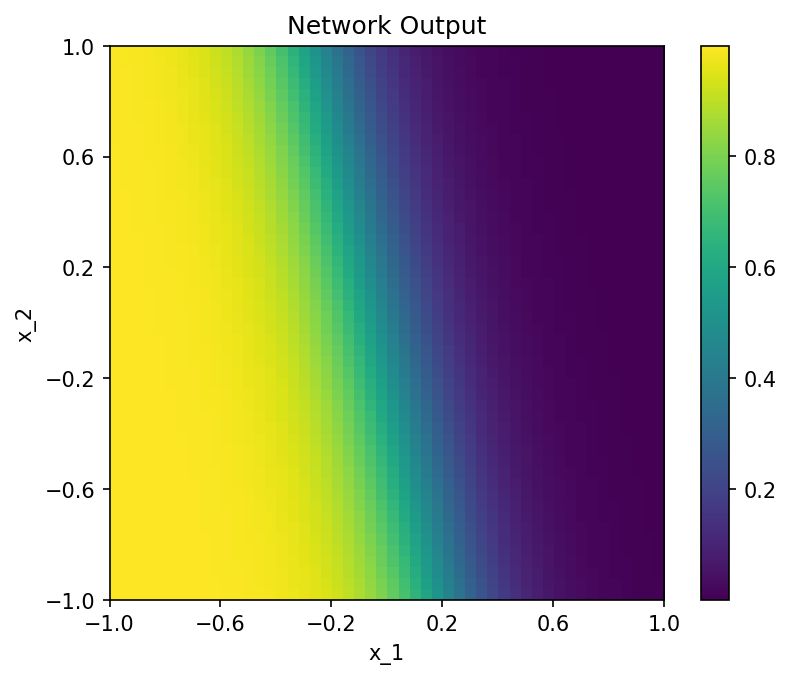

In [12]:
#Define our input values (50 steps from -1 to 1)
x1=np.linspace(-1,1,50)  #Input x1 vals
x2=np.linspace(-1,1,50)  #Input x2 vals
z=np.zeros((50,50))  # Placeholder array full of zeros for the output

#For clarity lets fill our output array by explictly looping over the x and y indices
#This is not the quickest way to do this operation... but we will come back to that later
for x1i in range(len(x1)):
    for x2i in range(len(x2)):
        z[x2i,x1i]=evaluate_neuron([x1[x1i],x2[x2i]],w,b)
        


#Now plot the results
fig, ax = plt.subplots() #Get the fig and ax objects for the plot 
im=ax.matshow(z,origin="lower",extent=(-1,1,-1,1)) #Plot the output z as a colormap with the origin in the bottom left
cb = fig.colorbar(im) #Get the colorbar for the range of z values
ax.xaxis.set_ticks_position('bottom') #Move the x-axis to the bottom (personal preference)
ax.set_title('Network Output') #Give our plot some title
ax.set_xticks(np.linspace(-1,1,6)) #Use a reasonable number and range of ticks
ax.set_yticks(np.linspace(-1,1,6))
ax.set_xlabel("x_1") #Slightly uninteresting labels
ax.set_ylabel("x_2")

#Each time we generate a new set of a random numbers for w and b and remake this plot it will look different
#Try it by executing the previous cell and then this one.

## Let's add a hidden layer
Okay so without using any hidden layers in our network there is a limit to how 'interesting' a shape our network can make. So to make things more interesting let's try adding a hidden layer to our network.

In [30]:
Nin=2 #Number of input nodes
Nout=1 #Number of output nodes
Nhidden=50 #Number of hidden nodes

#Set the scale for the weights and biases
wMax=5
bMax=1

#Initialize the weights and biases with random numbers
w1=np.random.uniform(low=-1*wMax,high=+1*wMax,size=(Nhidden,Nin))
b1=np.random.uniform(low=-1*bMax,high=+1*bMax,size=(Nhidden))
w2=np.random.uniform(low=-1*wMax,high=+1*wMax,size=(Nout,Nhidden))
b2=np.random.uniform(low=-1*bMax,high=+1*bMax,size=(Nout))




In [31]:
def evaluate_network(x):
    global w1,b1,w2,b2
    y=evaluate_neuron(x,w1,b1)
    z=evaluate_neuron(y,w2,b2)
    return z

print(evaluate_network([0.5,0.5]))

[0.00701709]


C:\Users\x390\AppData\Local\Temp\ipykernel_4100\1966688034.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[x1i,x2i]=evaluate_network([x1[x1i],x2[x2i]])


Text(0, 0.5, 'x_2')

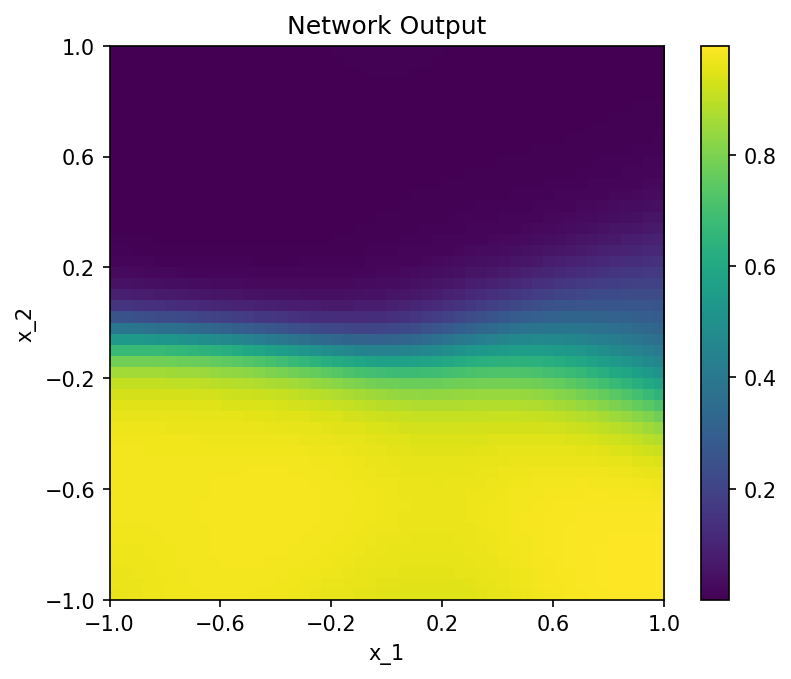

In [32]:
#Define our input values (50 steps from -1 to 1)
x1=np.linspace(-1,1,50)  #Input x1 vals, 50 values linearly spaced from -1, 1
x2=np.linspace(-1,1,50)  #Input x2 vals
z=np.zeros((50,50))  # Placeholder for a 50x50 array full of zeros for the output

#For clarity lets fill our output array by explictly looping over the x and y indices
#This is not the quickest way to do this operation... but we will come back to that later
for x1i in range(len(x1)):
    for x2i in range(len(x2)):
        z[x1i,x2i]=evaluate_network([x1[x1i],x2[x2i]])
        
#Now plot the results
fig, ax = plt.subplots() #Get the fig and ax objects for the plot 
im=ax.matshow(z,origin='lower',extent=(-1,1,-1,1)) #Plot the output z as a colormap with the origin in the bottom left
cb = fig.colorbar(im) #Get the colorbar for the range of z values
ax.xaxis.set_ticks_position('bottom') #Move the x-axis to the bottom (personal preference)
ax.set_title('Network Output') #Give our plot some title
ax.set_xticks(np.linspace(-1,1,6)) #Use a reasonable number and range of ticks
ax.set_yticks(np.linspace(-1,1,6))
ax.set_xlabel("x_1") #Slightly uninteresting labels
ax.set_ylabel("x_2")

## Speeding up processing
Now we will try and use some of the advanatages of numpy to define a set of functions that we will use to apply the network more efficiently. As ever this extra efficiency is going to come at the expense of clarity.

In [16]:
#We want to be able to evaluate some number of x values in parallel
#Let's start by picking 3 x1,x2 pairs to do as a test
xTest=[[-0.5,-0.5],[0,0],[+0.5,+0.5]]

#Define our network size
Nin=2 #Number of input nodes
Nout=1 #Number of output nodes
Nhidden=50 #Number of hidden nodes

#Set the scale for the weights and biases
wMax=3
bMax=1

#Initialize the weights and biases with random numbers
w1=np.random.uniform(low=-1*wMax,high=+1*wMax,size=(Nin,Nhidden))  #Note this is backwards to before
b1=np.random.uniform(low=-1*bMax,high=+1*bMax,size=(Nhidden))
w2=np.random.uniform(low=-1*wMax,high=+1*wMax,size=(Nhidden,Nout))
b2=np.random.uniform(low=-1*bMax,high=+1*bMax,size=(Nout))

#Define new network functions
def evaluate_neuron_parallel(x,w,b):
    y=np.dot(x,w)+b  
    #Note the dot product order has changed x(N,Nin), w=(Nin,Nhidden) so dot(x,w)=(N,Nhidden)
    #Also note that although b has dimensions of (Nhidden) it is broadcast to match the bigger size (N, Nhidden)
    #See more details on broadcasting at https://numpy.org/doc/stable/user/basics.broadcasting.html
    z=1/(1+np.exp(-y))
    return z

def evaluate_network_parallel(x):
    global w1,b1,w2,b2
    y=evaluate_neuron_parallel(x,w1,b1)
    z=evaluate_neuron_parallel(y,w2,b2)
    return z
    
#Now we can apply the network to our 3 samples in parallel
z=evaluate_network_parallel(xTest)
print("z.shape:",np.shape(z))
print("z:",z)


z.shape: (3, 1)
z: [[0.99997497]
 [0.99998376]
 [0.99998391]]


In [17]:
#Okay so three samples in parallel is not very impressive lets try a bigger number
Nparallel=10000
x=np.random.rand(Nparallel,2) #An array of 10000,2 random numbers
print("x.shape",x.shape)
print(x[0])
z=evaluate_network_parallel(x) #Evaluate the network on all 10000 input pairs
print(z[0])


x.shape (10000, 2)
[0.27565898 0.5990522 ]
[0.99998261]


### Now lets use our new function to plot some maps

First we need to make our x array of the image coordinates, then we can apply the network to all the pixels at once.

(50, 50)


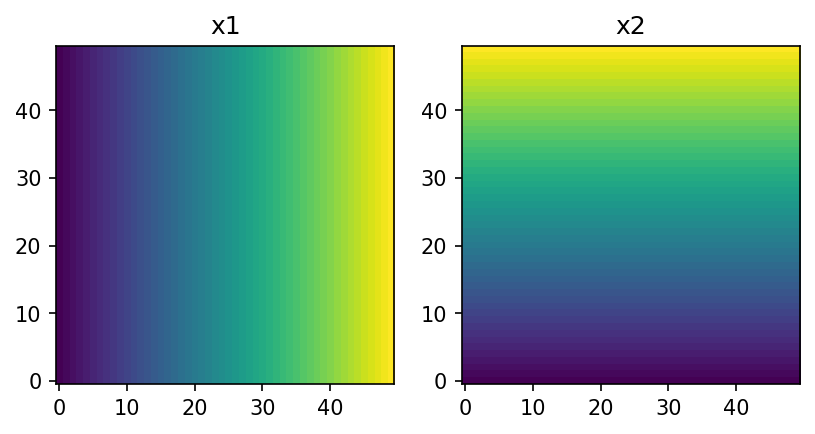

In [18]:
#First step is to form a coordinate mesh grid which takes 2 vectors of length N 
# and returns 2 arrays of size NxN one filled with the x1 coordinates one with the x2 
x1v, x2v = np.meshgrid(x1, x2)
print(np.shape(x1v))

#Now we can plot these coordinate arrays just to see that they are just the x1 and x2 values
fig, ax = plt.subplots(1,2)
im=ax[0].matshow(x1v,origin='lower')
ax[0].set_title('x1')
ax[0].xaxis.set_ticks_position('bottom') #Move the x-axis to the bottom (personal preference)
im=ax[1].matshow(x2v,origin='lower')
ax[1].set_title('x2')
ax[1].xaxis.set_ticks_position('bottom') #Move the x-axis to the bottom (personal preference)

In [19]:
#x1v and x2v are 2-D arrays where each columnin x1v haveing the same value and each row in x2v having the same value
x1flat=x1v.flatten()  #Flatten the 50x50 2-D array into a 2500 element 1d array
x2flat=x2v.flatten()
Nparallel=np.shape(x1flat)[0]  #This is a numpy way of getting the length of the first dimension of an array
print("np.shape(x1flat)",np.shape(x1flat))  #Just calling np.shape returns a tuple
print("Nparallel:",Nparallel) #But the first element of that tuple is the length
xTest=np.zeros((Nparallel,2)) # Now need to create the input, which will need to have a shape which is (2500,2)
xTest[:,0]=x1flat # fill first component (index 0)
xTest[:,1]=x2flat # fill second component
print("np.shape(xTest):",np.shape(xTest))

np.shape(x1flat) (2500,)
Nparallel: 2500
np.shape(xTest): (2500, 2)


In [20]:
#Now we can evaluate our network on all 2500 pairs of x1 and x2 in parallel
z=evaluate_network_parallel(xTest)
print("z.shape:",np.shape(z))

z.shape: (2500, 1)


Text(0, 0.5, 'x_2')

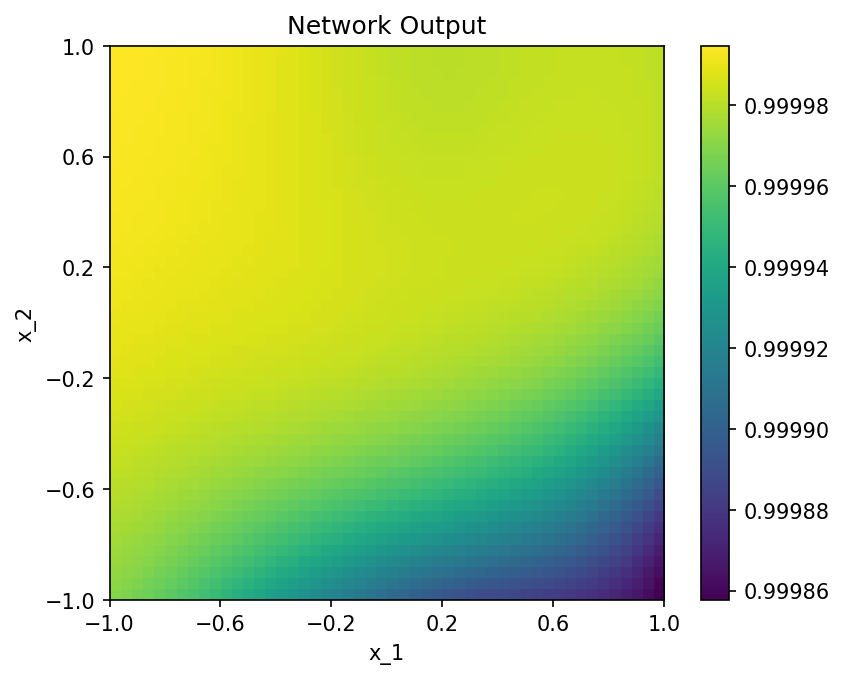

In [21]:
z2d=z.reshape((len(x1),len(x2)))  #Reshape the 2500,1 array into one which is 50x50
#Now plot the results
fig, ax = plt.subplots() #Get the fig and ax objects for the plot 
im=ax.matshow(z2d,origin='lower',extent=(-1,1,-1,1)) #Plot the output z as a colormap with the origin in the bottom left
cb = fig.colorbar(im) #Get the colorbar for the range of z values
ax.xaxis.set_ticks_position('bottom') #Move the x-axis to the bottom (personal preference)
ax.set_title('Network Output') #Give our plot some title
ax.set_xticks(np.linspace(-1,1,6)) #Use a reasonable number and range of ticks
ax.set_yticks(np.linspace(-1,1,6))
ax.set_xlabel("x_1") #Slightly uninteresting labels
ax.set_ylabel("x_2")

## Now let's spice things up by adding lots of hidden layers
This is just to illustrate that with enough hidden layers (and layers of a big enough size) some very complicated structures can be achieved.

In [40]:
#Define our network size
Nin=2 #Number of input nodes
Nout=1 #Number of output nodes
Nhidden=50 #Number of nodes per hidden layer
Nhidlayers=20 #Number of hidden layers

wMax=5
bMax=1

#Initialize the weights and biases with random numbers
wIn=np.random.uniform(low=-1*wMax,high=+1*wMax,size=(Nin,Nhidden))  
bIn=np.random.uniform(low=-1*bMax,high=+1*bMax,size=(Nhidden))
wOut=np.random.uniform(low=-1*wMax,high=+1*wMax,size=(Nhidden,Nout))
bOut=np.random.uniform(low=-1*bMax,high=+1*bMax,size=(Nout))
wMid=np.random.uniform(low=-1*wMax,high=+1*wMax,size=(Nhidlayers,Nhidden,Nhidden))
bMid=np.random.uniform(low=-1*bMax,high=+1*bMax,size=(Nhidlayers,Nhidden))

def evaluate_network_multilayer(x):
    global wIn,bIn,wOut,bOut,wMid,bMid
    y=evaluate_neuron_parallel(x,wIn,bIn)
    for i in range(Nhidlayers):
        y=evaluate_neuron_parallel(y,wMid[i],bMid[i])
    z=evaluate_neuron_parallel(y,wOut,bOut)
    return z

def get_network_out(x1,x2):
    x1v, x2v = np.meshgrid(x1, x2)
    x1flat=x1v.flatten()
    x2flat=x2v.flatten()
    Nparallel=np.shape(x1flat)[0]
    xTest=np.zeros((Nparallel,2))
    xTest[:,0]=x1flat # fill first component (index 0)
    xTest[:,1]=x2flat # fill second component
    z=evaluate_network_multilayer(xTest)
    return z.reshape((len(x1),len(x2)))
    

Text(0, 0.5, 'x_2')

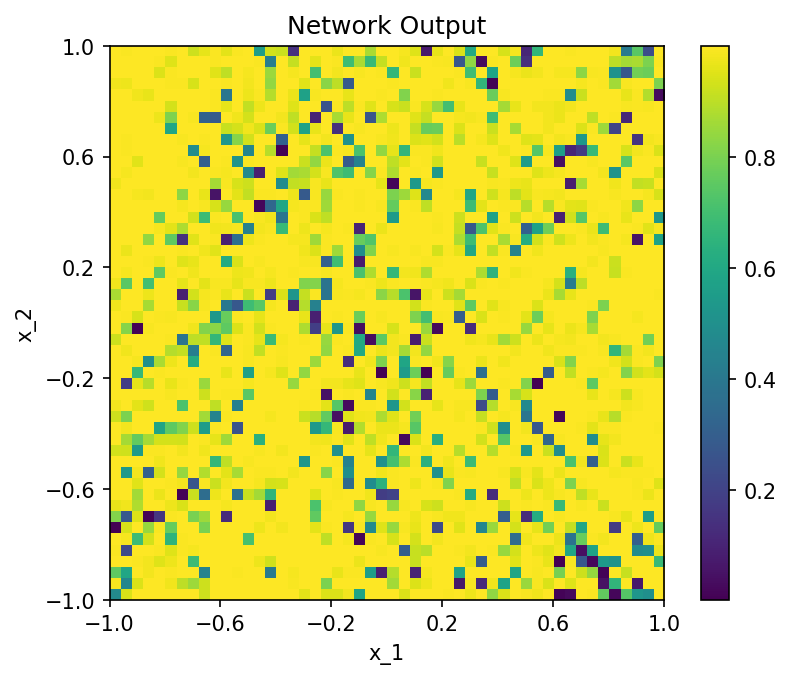

In [41]:
numPoints=50
x1=np.linspace(-1,1,numPoints)  #Input x1 vals
x2=np.linspace(-1,1,numPoints)  #Input x2 vals
z2d=get_network_out(x1,x2)
#Now plot the results
fig, ax = plt.subplots() #Get the fig and ax objects for the plot 
im=ax.matshow(z2d,origin='lower',extent=(-1,1,-1,1)) #Plot the output z as a colormap with the origin in the bottom left
cb = fig.colorbar(im) #Get the colorbar for the range of z values
ax.xaxis.set_ticks_position('bottom') #Move the x-axis to the bottom (personal preference)
ax.set_title('Network Output') #Give our plot some title
ax.set_xticks(np.linspace(-1,1,6)) #Use a reasonable number and range of ticks
ax.set_yticks(np.linspace(-1,1,6))
ax.set_xlabel("x_1") #Slightly uninteresting labels
ax.set_ylabel("x_2")

Clearly with the hidden layers we are able to create a much more complicated structure in our (x1,x2) data space than we were able to with just a single hidden layer. Next we can try and add more pixels to get a crisper looking image. Obviously this will come at the cost of more processing time.

Text(0, 0.5, 'x_2')

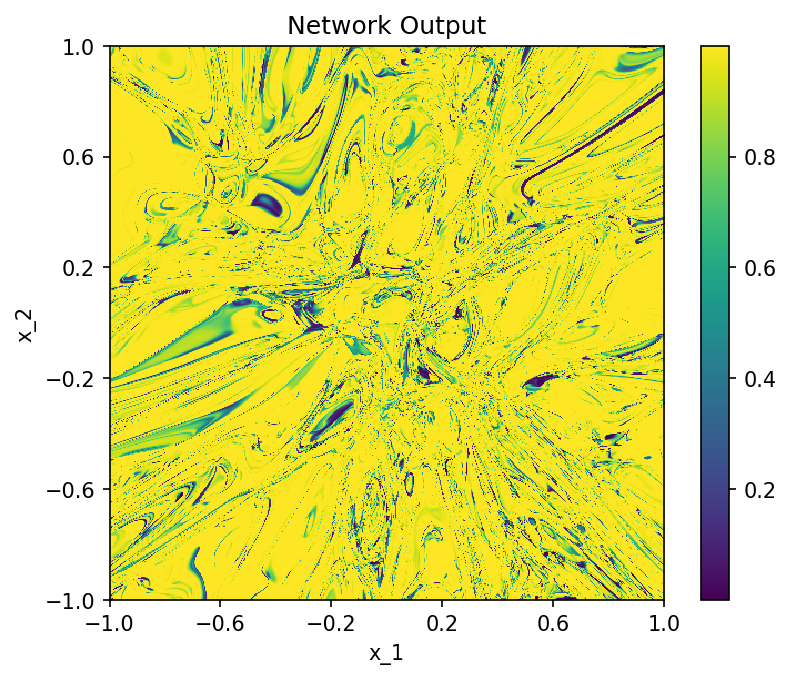

In [42]:
#Same thing but with 100 times more points 500x500
numPoints=500
x1=np.linspace(-1,1,numPoints)  #Input x1 vals
x2=np.linspace(-1,1,numPoints)  #Input x2 vals
z2d=get_network_out(x1,x2)
#Now plot the results
fig, ax = plt.subplots() #Get the fig and ax objects for the plot 
im=ax.matshow(z2d,origin='lower',extent=(-1,1,-1,1)) #Plot the output z as a colormap with the origin in the bottom left
cb = fig.colorbar(im) #Get the colorbar for the range of z values
ax.xaxis.set_ticks_position('bottom') #Move the x-axis to the bottom (personal preference)
ax.set_title('Network Output') #Give our plot some title
ax.set_xticks(np.linspace(-1,1,6)) #Use a reasonable number and range of ticks
ax.set_yticks(np.linspace(-1,1,6))
ax.set_xlabel("x_1") #Slightly uninteresting labels
ax.set_ylabel("x_2")

### Trying out the ReLU
So far this has all been using the sigmoid as the activation function. We can also try and use the ReLU as teh activation function

In [43]:
# With our simple ReLU since the numbers can get arbritrarily large (in the positive direction) we typically need 
# to start with smaller weights and biases than with the sigmoid which is constrained to lie between -1 and 1
wMax=0.2
bMax=0.2

#Initialize the weights and biases with random numbers
wIn=np.random.uniform(low=-1*wMax,high=+1*wMax,size=(Nin,Nhidden))  
bIn=np.random.uniform(low=-1*bMax,high=+1*bMax,size=(Nhidden))
wOut=np.random.uniform(low=-1*wMax,high=+1*wMax,size=(Nhidden,Nout))
bOut=np.random.uniform(low=-1*bMax,high=+1*bMax,size=(Nout))
wMid=np.random.uniform(low=-1*wMax,high=+1*wMax,size=(Nhidlayers,Nhidden,Nhidden))
bMid=np.random.uniform(low=-1*bMax,high=+1*bMax,size=(Nhidlayers,Nhidden))

def evaluate_neuron_relu(x,w,b): #Note hear we are being lazy and using the same function name
    y=np.dot(x,w)+b  
    #print(y)
    return y*(y>0)

def evaluate_network_multilayer_relu(x):
    global wIn,bIn,wOut,bOut,wMid,bMid
    y=evaluate_neuron_relu(x,wIn,bIn)
    for i in range(Nhidlayers):
        y=evaluate_neuron_relu(y,wMid[i],bMid[i])
    z=evaluate_neuron_relu(y,wOut,bOut)
    return z

def get_network_out_relu(x1,x2):
    x1v, x2v = np.meshgrid(x1, x2)
    x1flat=x1v.flatten()
    x2flat=x2v.flatten()
    Nparallel=np.shape(x1flat)[0]
    xTest=np.zeros((Nparallel,2))
    xTest[:,0]=x1flat # fill first component (index 0)
    xTest[:,1]=x2flat # fill second component
    z=evaluate_network_multilayer_relu(xTest)
    return z.reshape((len(x1),len(x2)))

Text(0, 0.5, 'x_2')

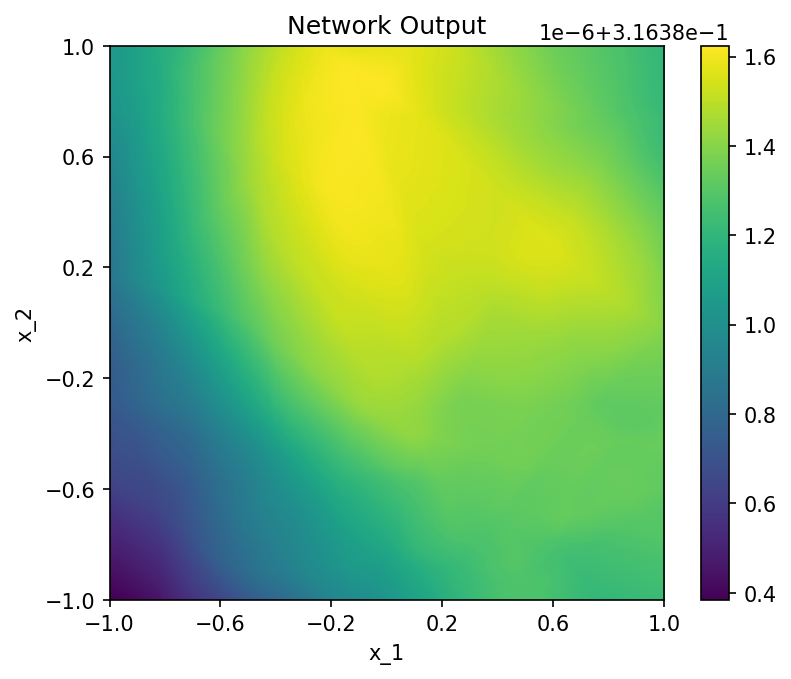

In [45]:
#Same thing but with 100 times more points 500x500
numPoints=500
x1=np.linspace(-1,1,numPoints)  #Input x1 vals
x2=np.linspace(-1,1,numPoints)  #Input x2 vals
z2d=get_network_out_relu(x1,x2)
#Now plot the results
fig, ax = plt.subplots() #Get the fig and ax objects for the plot 
im=ax.matshow(z2d,origin='lower',extent=(-1,1,-1,1)) #Plot the output z as a colormap with the origin in the bottom left
cb = fig.colorbar(im) #Get the colorbar for the range of z values
ax.xaxis.set_ticks_position('bottom') #Move the x-axis to the bottom (personal preference)
ax.set_title('Network Output') #Give our plot some title
ax.set_xticks(np.linspace(-1,1,6)) #Use a reasonable number and range of ticks
ax.set_yticks(np.linspace(-1,1,6))
ax.set_xlabel("x_1") #Slightly uninteresting labels
ax.set_ylabel("x_2")

# Suggested tasks
1. Explore what happens when you change the spread of the random weights
2. Visualise the results of a multi-layer randomly initialized NN (meaning: take a fixed randomly initialized multi-layer network, and then throw away the layers above layer n; and directly connect layer n to the output layer; see how results change when you vary n;